In [1]:
import scipy
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind # library for hipothesis testing

The aim of this study is to study stock price trend btween two different stocks- IBM and ORACLE. For this study I will collect a sample when IBM stock suffer from a drop and check if it also happens to Oracle. I will use a t-student independent test.

# Importing oracle stocks and preparing data

In [2]:
orcl = pd.read_csv('ORCL.csv')
orcl.drop('Adj Close', axis = 1, inplace=True)
orcl['Date'] = pd.to_datetime(orcl['Date'])
orcl.head()

,Date,Open,High,Low,Close,Volume
0,1986-03-12,0.063272,0.064043,0.063272,0.063272,393012000
1,1986-03-13,0.064815,0.065586,0.064815,0.064815,125290800
2,1986-03-14,0.067130,0.067901,0.067130,0.067130,57866400
3,1986-03-17,0.066358,0.066358,0.065586,0.065586,28285200
4,1986-03-18,0.064815,0.064815,0.064043,0.064043,32335200


In [3]:
orcl.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [4]:
ibm = pd.read_csv('IBM_clean.csv')
ibm['Date'] = pd.to_datetime(ibm['Date'])
ibm.head()

,Date,Open,High,Low,Close,Volume
0,1962-01-02,7.713333,7.713333,7.626667,7.626667,387200
1,1962-01-03,7.626667,7.693333,7.626667,7.693333,288000
2,1962-01-04,7.693333,7.693333,7.613333,7.616667,256000
3,1962-01-05,7.606667,7.606667,7.453333,7.466667,363200
4,1962-01-08,7.460000,7.460000,7.266667,7.326667,544000


In [5]:
ibm.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

# Selecting period of drops in each stock price

In [6]:
orcl1 = orcl[(orcl['Date'] > '2015-05-01') & (orcl['Date'] < '2016-02-17')]

In [7]:
orcl1 = orcl1.set_index('Date')

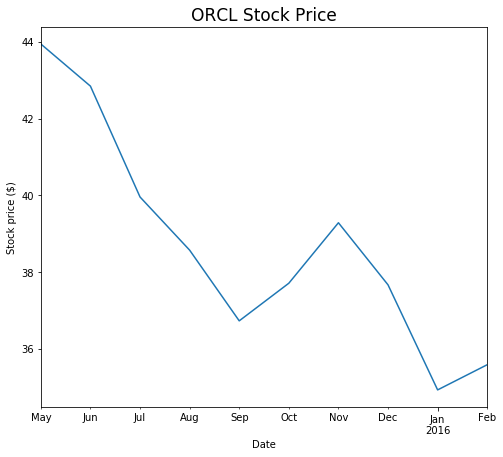

In [8]:
plt.title('ORCL Stock Price', fontsize= 17)
plt.xlabel('Date')
plt.ylabel('Stock price ($)')

orcl1['Close'].resample('MS').mean().plot(figsize=(8, 7))

plt.savefig('ORCL_stats.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

In [9]:
ibm1 = ibm[(ibm['Date'] > '2015-05-01') & (ibm['Date'] < '2016-02-17')]

In [10]:
ibm1 = ibm1.set_index('Date')

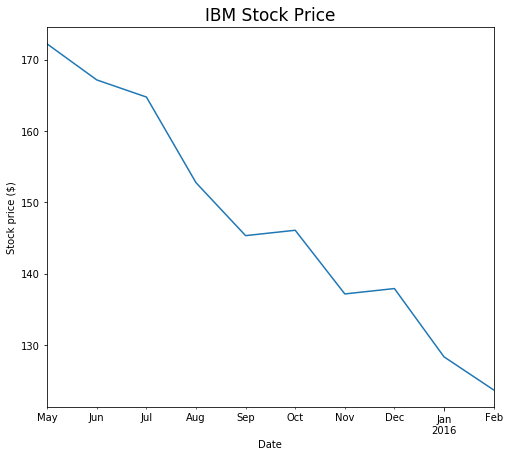

In [11]:
plt.title('IBM Stock Price', fontsize= 17)
plt.xlabel('Date')
plt.ylabel('Stock price ($)')

ibm1['Close'].resample('MS').mean().plot(figsize=(8, 7))

plt.savefig('IBM_stats.jpg', bbox_inches = 'tight', transparent = True)
plt.show()

# t-Test (oracle and IBM stocks)

In [12]:
from scipy.stats import ttest_ind 

In [13]:
print(ibm1['Close'][82:].mean(), ibm1['Close'][82:].std())
print(orcl1['Close'][82:].mean(),orcl1['Close'][82:].std())

137.97965769230763 8.389627492969888
37.13829054700856 1.6024938144463627


In [41]:
ttest_ind(ibm1['Close'][82:], orcl1['Close'][82:], equal_var=True)

Ttest_indResult(statistic=127.70490838372433, pvalue=5.842528734640816e-217)

The p-value is extremely low (<0.05), so we reject the null hypothesis that the mean of the two stocks are equal and accept that they might be different.

# t-Test (tweets sentiments and IBM stocks)

In [15]:
ds = pd.read_csv('ml_data.csv')
ds['Date'] = pd.to_datetime(ds['Date'])

In [16]:
ds_t = ds[(ds['Date'] > '2015-08-31') & (ds['Date'] < '2016-02-17')]

In [17]:
ds_t = ds_t.set_index('Date')

In [19]:
print(ds_t['Close'][82:].mean(), ds_t['Close'][82:].std())
print(ds_t['compound'][82:].mean(), ds_t['compound'][82:].std())

127.81939421212122 6.165510691464478
0.388 0.39065864735085537


In [40]:
ttest_ind(ds_t['Close'][82:], ds_t['compound'][82:], equal_var=True)

Ttest_indResult(statistic=118.49343963064668, pvalue=1.0380823170964858e-76)

Null hypothesis: there is no significant difference between sample Mean of stocks and sentiment polarity means.

We can reject the null hypothesis. P < 0.05. We accept H1 that assumes that there is some difference between the true mean of stocks and the sentiment mean.

# Chi test

In [36]:
import scipy
from scipy import stats
from scipy.stats import chi2

In [37]:
observed_values = ibm1['Close'][82:]
expected_values = orcl1['Close'][82:]

In [38]:
chi = sum((observed_values - expected_values)**2 / expected_values)   # fill with code and data
dof = 98

alpha = 0.05

critical_value = chi2.ppf(q = 1 - alpha, df = dof)   # ppf: Percent Point Function
print("Null hypothesis rejected") if critical_value < chi else print("Null hypothesis can't be rejected")

Null hypothesis rejected
